## E-Commerce Customer Segmentation

### Project Overview
* Customer segmentation using K-Means


### Code and Resources Used 
**Python Version:** 3.7  
**Packages:** pandas, numpy, matplotlib, seaborn, sklearn.

### Dataset
The dataset is taken from The Kaggle Repository (https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data)  


### Notebook content:

1. Exploratory Data Analysis
2. Data Preparation
3. K-mean algorith training
4. Results visualization
5. Conclusion

### 1. Exploratory Data Analysis
---

In [27]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly as py
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('dataset/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Find numerical variables (continuous, discrete, target)

In [8]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables:'.format(len(numerical)))
numerical

There are 4 numerical variables:


['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

### Continuous variables

In [10]:
continuous = [var for var in numerical if var not in discrete and var not in ['price']]

print('There are {} numerical and continuous variables'.format(len(continuous)))
continuous

There are 4 numerical and continuous variables


['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

### Find categorical variables 

In [11]:
categorical = [var for var in data.columns if data[var].dtype=='O']  

print('There are {} categorical variables:'.format(len(categorical)))
categorical

There are 1 categorical variables:


['Gender']

Categorical variables inspection:

In [12]:
pd.set_option('display.max_colwidth', 0)
data[categorical].agg(['unique']).transpose()

,unique
Gender,"[Male, Female]"


The dataset is almost ready to be used and train a K-means algorithm. We'll transform the only categorical variable in:

In [7]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
data['Gender'] = (data['Gender'] == 'Male').astype(int)

In [9]:
data['Gender'].unique()

array([1, 0])

In [22]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


#### Variables distributions

In [10]:
fts = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']

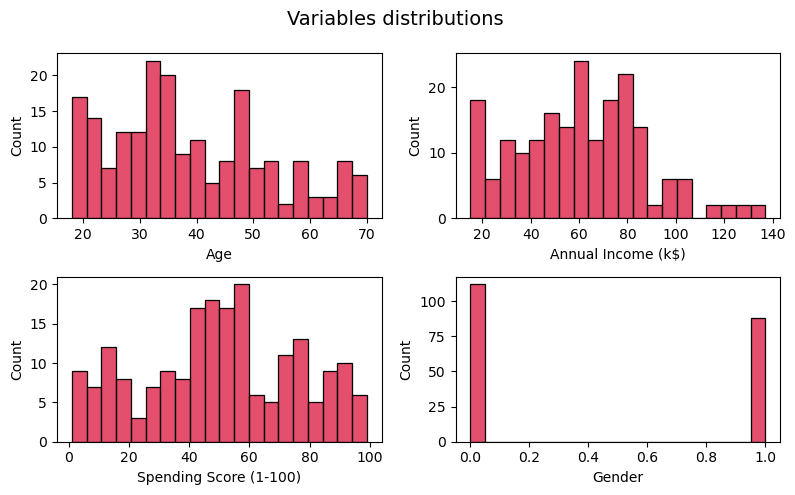

In [67]:
fig = plt.subplots(nrows=2,ncols=2,figsize = (8,5))

for i in range(len(fts)):
    plt.subplot(2,2,i+1)
    ax = sns.histplot(data[fts[i]], color='crimson', bins=20)

plt.suptitle('Variables distributions', fontsize=14)
plt.tight_layout()

**Figure 1.** Variables distributions.

### 2. Data Preparation
---

In [11]:
data_ = data.drop(['CustomerID', 'Gender'], axis=1)

In [13]:
data_.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Data scaling

In [14]:
data_scaled = StandardScaler().fit_transform(data_)
data_scaled[:2,:]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407]])

## Inertia

In [15]:
num_clusters = [i for i in range(2, 20)]

def kmeans_inertia(num_clusters, x_vals):
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    
    return inertia

In [16]:
inertia = kmeans_inertia(num_clusters, data_scaled)
inertia

[389.3861889564371,
 295.2122461555489,
 205.22514747675916,
 168.24758017556837,
 133.86842085478855,
 120.43283250037277,
 103.81525583671635,
 92.34945767113052,
 82.88526644450906,
 73.55133274456252,
 67.85742656057134,
 63.49410418183944,
 60.44403271944566,
 56.63006124642648,
 54.34569281652375,
 51.41204045782634,
 48.99574982281068,
 47.32182509755867]

## Elbow Plot

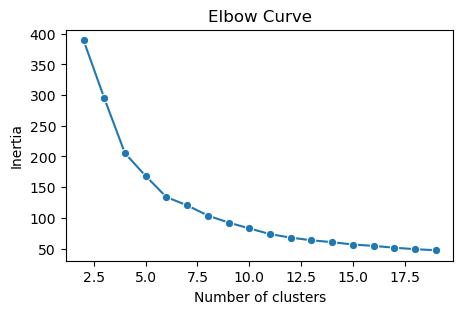

In [74]:
plt.figure(figsize=(5,3))
plt.title("Elbow Curve")
plot = sns.lineplot(x=num_clusters, y=inertia, marker='o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

**Figure 2.** Inertia values for each number of cluster options.

In [62]:
def kmeans_sil(num_clusters, x_vals):
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    
    return sil_score

Silhouette scores:

In [63]:
sil_score = kmeans_sil(num_clusters, data_scaled)
sil_score

[0.33547192894004574,
 0.357793388710272,
 0.4039582785148566,
 0.41664341513732767,
 0.4284167762892593,
 0.4111545340123845,
 0.408443059554235,
 0.4200735068174298,
 0.42261564078864017,
 0.4036984597830522,
 0.3977316598329962,
 0.3727071680898717,
 0.36713095500815807,
 0.36004583642452465,
 0.33703576483039765,
 0.340254418551055,
 0.3520429635945954,
 0.341490008621757]

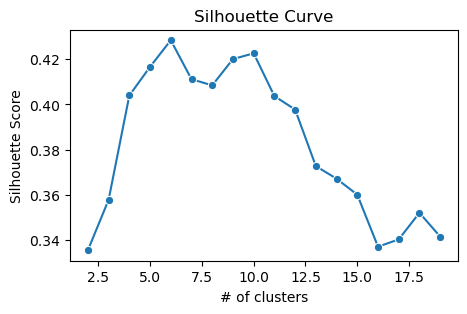

In [75]:
plt.figure(figsize=(5,3))
plt.title("Silhouette Curve")
plot = sns.lineplot(x=num_clusters, y=sil_score, marker='o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

**Figure 3.** Silhouette scores for each number of cluster options.

Silhouette highest score is when data is partitioned in six clusters. 

### 3. K-mean algorith training
---

In [18]:
kmeans6 = KMeans(n_clusters=6, random_state=42)
kmeans6.fit(data_scaled)

KMeans(n_clusters=6, random_state=42)

In [19]:
print(kmeans6.labels_[:5])
print('Unique labels:', np.unique(kmeans6.labels_))

[0 0 5 0 5]
Unique labels: [0 1 2 3 4 5]


Now that we have our labels, it's important to understand what they mean and decide whether this clustering makes sense for our use case. Here's where it helps to keep our unscaled data from the beginning. We can assign a new column to the original _unscaled_ dataframe with the cluster assignment from the final K-means model.

In [20]:
labels = kmeans6.labels_
centroids = kmeans6.cluster_centers_

Let's check the labels for each instance:

In [21]:
labels

array([0, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 5, 3,
       5, 0, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 4, 3, 4, 2, 4, 2, 4, 2, 4,
       3, 4, 2, 4, 2, 4, 3, 4, 2, 4, 3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

And the 6 centroids coordinates:

In [22]:
centroids

array([[-0.99396865, -1.34734766,  1.06404834],
       [ 1.25472096, -0.24021294, -0.04399777],
       [ 0.22171558,  1.08322527, -1.29005223],
       [-0.86515664, -0.13196835, -0.08043031],
       [-0.44191719,  0.99158305,  1.23950275],
       [ 0.47895722, -1.30822992, -1.19644353]])

We add the labels to our our original (before scaling) dataframe:

In [23]:
data_['cluster'] = kmeans6.labels_
data_.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,5
3,23,16,77,0
4,31,17,40,5


### 4. Results visualization
---

In [72]:
fig = px.scatter_3d(data_, x='Age', y='Spending Score (1-100)', z='Annual Income (k$)',
              color='cluster', size_max=18, opacity=0.7, width=600, height=500)
# fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

**Figure 4.** The 6 data clusters generated by the K-Means algorithm.

Sources →

<!-- https://plotly.com/python/3d-scatter-plots/ -->
<!-- https://plotly.com/python/setting-graph-size/ -->